In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import pyspark.pandas as ps

import matplotlib.pyplot as plt
import numpy as np

## Initialisation de Spark

In [8]:
spark = SparkSession.builder.appName("Projet InfoD").config("spark.jars", "/home1/tc737978/Documents/M2/Info décisionnelle/postgresql-42.7.5.jar").config("spark.driver.memory", "10g").config("spark.executor.memory", "10g").getOrCreate()
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)


## Chargement des données

In [9]:
tip = spark.read.csv("yelp_academic_dataset_tip.csv", header=True, inferSchema=True)
business_source = pd.read_json("yelp_academic_dataset_business.json", lines=True)
business_source = spark.createDataFrame(business_source)
checkin = spark.read.json("yelp_academic_dataset_checkin.json")
reviews = spark.read.jdbc("jdbc:postgresql://stendhal:5432/tpid2020", "yelp.review", properties={"user": "tpid", "password": "tpid", "driver": "org.postgresql.Driver"})

In [10]:
tip.show()

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|UYX5zL_Xj9WEc_Wp-...|               0|2013-11-26 18:20:08|Here for a quick mtg|hf27xTME3EiCp6NL6...|
|Ch3HkwQYv1YKw_FO0...|               0|2014-06-15 22:26:45|Cucumber strawber...|uEvusDwoSymbJJ0au...|
|rDoT-MgxGRiYqCmi0...|               0|2016-07-18 22:03:42|Very nice good se...|AY-laIws3S7YXNl_f...|
|OHXnDV01gLokiX1EL...|               0|2014-06-06 01:10:34|It's a small plac...|Ue_7yUlkEbX4AhnYd...|
|GMrwDXRlAZU2zj5nH...|               0|2011-04-08 18:12:01|8 sandwiches, $24...|LltbT_fUMqZ-ZJP-v...|
|ALwAlxItASeEs2vYA...|               0|2015-05-20 20:17:38|Great ramen! Not ...|HHNBqfbDR8b1iq-QG...|
|d_L-rfS1vT3JMzgCU...|               0|2014-09-01 01:23:48|Cochinita Pibil w...|r0

In [11]:
business_source.show()

25/03/12 16:26:25 WARN TaskSetManager: Stage 10 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+--------------------+---------------+-----+-----------+-------------+---------------+-----+------------+-------+--------------------+--------------------+--------------------+
|         business_id|                name|             address|           city|state|postal_code|     latitude|      longitude|stars|review_count|is_open|          attributes|          categories|               hours|
+--------------------+--------------------+--------------------+---------------+-----+-----------+-------------+---------------+-----+------------+-------+--------------------+--------------------+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|     10913 Bailey Rd|      Cornelius|   NC|      28031|   35.4627242|    -80.8526119|  3.5|          36|      1|{BikeParking -> T...|Active Life, Gun/...|{Thursday -> 11:0...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|8880 E Via Linda,...|     Scottsdale|   AZ|      85258|   33.5694041|   -111.8902

In [12]:
checkin.show()

+--------------------+--------------------+
|         business_id|                date|
+--------------------+--------------------+
|--1UhMGODdWsrMast...|2016-04-26 19:49:...|
|--6MefnULPED_I942...|2011-06-04 18:22:...|
|--7zmmkVg-IMGaXbu...|2014-12-29 19:25:...|
|--8LPVSo5i0Oo61X0...| 2016-07-08 16:43:30|
|--9QQLMTbFzLJ_oT-...|2010-06-26 17:39:...|
|--9e1ONYQuAa-CB_R...|2010-02-08 05:56:...|
|--DaPTJW3-tB1vP-P...|2012-06-03 17:46:...|
|--DdmeR16TRb3LsjG...|2012-11-02 21:26:...|
|--EF5N7P70J_UYBTP...|2018-05-25 19:52:...|
|--EX4rRznJrltyn-3...|2010-02-26 17:05:...|
|--FBCX-N37CMYDfs7...|2010-05-31 07:57:...|
|--FLdgM0GNpXVMn74...|2012-10-23 18:47:...|
|--FnvijzY20d1nk9H...|2019-09-19 02:42:...|
|--GM_ORV2cYS-h38D...|2011-09-11 18:16:...|
|--I7YYLada0tSLkOR...|2014-11-07 00:51:...|
|--KCl2FvVQpvjzmZS...|2011-07-29 16:53:...|
|--KQsXc-clkO7oHRq...|2010-05-02 23:57:...|
|--Ni3oJ4VOqfOEu7S...| 2019-06-07 17:54:58|
|--Rsj71PBe31h5Ylj...|2011-12-15 18:09:...|
|--S62v0QgkqQaVUhF...|2010-12-25

In [13]:
reviews.show()

+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+---------------+
|         business_id|cool|      date|funny|           review_id|stars|                text|useful|             user_id|spark_partition|
+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+---------------+
|caKRXynM5bY922pGt...|   1|2018-07-13|    0|OLi8lF3lDA-m2MJ5F...|  5.0|This place opens ...|     1|IzKc0jBJnmEbmOA9F...|             50|
|negmHffTWsRXc6oSf...|   0|2019-04-13|    0|sUSAK7TvxUHI_gQJ6...|  1.0|The veggies in th...|     1|S8sG--6CTU-JcasOT...|             51|
|qd9ecz-yl6Uz-YnG8...|   0|2015-12-28|    0|IL-0SfDzW8plzZfL-...|  1.0|Tried to call to ...|     4|07ape6-uoZ0rHFx8E...|             52|
|nfp8_0HXx7T-Gr-4k...|   0|2019-02-18|    0|a6Ntlo6SiZIWRJczl...|  5.0|Such an incredibl...|     1|vA6O0TyPMS4gUoU0O...|             53|
|LajfwzcIvJMOhxmYK...|   0|2016-07-20|   

## Création des dataframes

### Business

In [14]:
Business = business_source.select("business_id")
Business = Business.withColumn("ID_Categorie", monotonically_increasing_id())
Business = Business.withColumn("ID_Attributes", monotonically_increasing_id())
Business = Business.withColumn("ID_Hours", monotonically_increasing_id())
Business = Business.withColumn("ID_Localisation", monotonically_increasing_id())
Business = Business.withColumn("ID_Reviews", monotonically_increasing_id())
Stars = reviews.select("business_id", "stars").groupBy("business_id").agg(avg("stars").alias("avg_stars")).na.fill(0)
Business = Business.join(Stars, on="business_id", how="left")
Business.show()


25/03/12 16:27:18 WARN TaskSetManager: Stage 13 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+------------+-------------+-----------+---------------+-----------+------------------+
|         business_id|ID_Categorie|ID_Attributes|   ID_Hours|ID_Localisation| ID_Reviews|         avg_stars|
+--------------------+------------+-------------+-----------+---------------+-----------+------------------+
|02LPDp1m9V8EcS79d...| 77309411333|  77309411333|77309411333|    77309411333|77309411333|               4.0|
|3LF3HqwhUJYT9ma48...| 51539607561|  51539607561|51539607561|    51539607561|51539607561| 4.470588235294118|
|8oOUIbIrscMlf4UOT...| 25769803793|  25769803793|25769803793|    25769803793|25769803793|3.1666666666666665|
|A89Re1NzGXBNuAk6C...| 60129542149|  60129542149|60129542149|    60129542149|60129542149|4.2592592592592595|
|B9mAYXYi0XS2QJ7Is...| 60129542162|  60129542162|60129542162|    60129542162|60129542162| 4.333333333333333|
|CRgJsbZdYtk6bmGR8...| 85899345940|  85899345940|85899345940|    85899345940|85899345940| 2.142857142857143|
|CsLQLiRoafpJPJSkN.

### Localisation

In [15]:
Localisation = Business.select("ID_Localisation", "business_id")
Localisation = Localisation.join(business_source.select("business_id", "state", "city", "postal_code", "address", "latitude", "longitude"), on="business_id", how="left")
Localisation = Localisation.withColumn("country", \
                        when(Localisation["state"] == "NC", "USA") \
                        .when(Localisation["state"] == "AZ", "USA") \
                        .when(Localisation["state"] == "QC", "CAN") \
                        .when(Localisation["state"] == "NV", "USA") \
                        .when(Localisation["state"] == "IL", "USA") \
                        .when(Localisation["state"] == "AB", "CAN") \
                        .when(Localisation["state"] == "PA", "USA") \
                        .when(Localisation["state"] == "WI", "USA") \
                        .when(Localisation["state"] == "SC", "USA") \
                        .when(Localisation["state"] == "OH", "USA") \
                        .when(Localisation["state"] == "CA", "USA") \
                        .when(Localisation["state"] == "TX", "USA") \
                        .when(Localisation["state"] == "NY", "USA") \
                        .when(Localisation["state"] == "CO", "USA") \
                        .when(Localisation["state"] == "XWY", "USA") \
                        .when(Localisation["state"] == "GA", "USA") \
                        .when(Localisation["state"] == "BC", "CAN") \
                        .when(Localisation["state"] == "YT", "CAN") \
                        .when(Localisation["state"] == "HPL", "USA") \
                        .when(Localisation["state"] == "AL", "USA") \
                        .when(Localisation["state"] == "UT", "USA") \
                        .when(Localisation["state"] == "VT", "USA") \
                        .when(Localisation["state"] == "WA", "USA") \
                        .when(Localisation["state"] == "NE", "USA") \
                        .when(Localisation["state"] == "DOW", "USA") \
                        .when(Localisation["state"] == "MI", "USA") \
                        .when(Localisation["state"] == "FL", "USA") \
                        .when(Localisation["state"] == "AR", "USA") \
                        .when(Localisation["state"] == "HI", "USA") \
                        .when(Localisation["state"] == "MB", "CAN") \
                        .when(Localisation["state"] == "OR", "USA") \
                        .when(Localisation["state"] == "AK", "USA") \
                        .when(Localisation["state"] == "VA", "USA") \
                        .when(Localisation["state"] == "CT", "USA") \
                        .when(Localisation["state"] == "MO", "USA") \
                        .when(Localisation["state"] == "DUR", "USA") \
                        .when(Localisation["state"] == "ON", "CAN") \
                        .otherwise("Unknown"))
Localisation = Localisation.drop("business_id")
Localisation.show()

25/03/12 16:27:31 WARN TaskSetManager: Stage 18 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:27:31 WARN TaskSetManager: Stage 19 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


+---------------+-----+----------+-----------+--------------------+-------------+--------------+-------+
|ID_Localisation|state|      city|postal_code|             address|     latitude|     longitude|country|
+---------------+-----+----------+-----------+--------------------+-------------+--------------+-------+
|    77309411333|   NC| Charlotte|      28226|4100 Pineville Ma...|   35.0942647|   -80.7953405|    USA|
|    60129542149|   PA|  Tarentum|      15084|2025 Pittsburgh M...|    40.570458|    -79.802589|    USA|
|    60129542160|   OH|    Aurora|      44202|114 Barrington To...|    41.321138|    -81.348124|    USA|
|    34359738384|   AZ|   Phoenix|      85043|  350 North 67th Ave|   33.4519052|  -112.2039233|    USA|
|    25769803786|   ON|   Toronto|    M4L 1A8|  999 Eastern Avenue|    43.663279|   -79.3198933|    CAN|
|             12|   WI| Middleton|      53562|   2831 Parmenter St|43.1053100891|-89.5101417974|    USA|
|    68719476756|   ON|   Toronto|    M6S 3Z1|     238 

### Reviews

In [16]:
nb_reviews = reviews.groupBy("business_id").count().withColumnRenamed("count", "Nb_Reviews")
nb_tips = tip.groupBy("business_id").count().withColumnRenamed("count", "Nb_Tips")
nb_checkins = checkin.withColumn("checkin", explode(split(col("date"), ", "))).groupBy("business_id").count().withColumnRenamed("count", "Nb_Checkins")
Reviews = Business.select("ID_Reviews", "business_id")
Reviews = Reviews.join(nb_reviews, on="business_id", how="left").drop(nb_reviews["business_id"])
Reviews = Reviews.join(nb_tips, on="business_id", how="left").drop(nb_tips["business_id"])
Reviews = Reviews.join(nb_checkins, on="business_id", how="left").drop(nb_checkins["business_id"])
Reviews = Reviews.drop("business_id")
Reviews.show()

25/03/12 16:27:32 WARN TaskSetManager: Stage 26 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


+-----------+----------+-------+-----------+
| ID_Reviews|Nb_Reviews|Nb_Tips|Nb_Checkins|
+-----------+----------+-------+-----------+
|77309411333|         8|   NULL|         35|
|60129542149|        27|     40|        161|
|60129542160|         5|   NULL|          1|
|34359738384|        15|      3|         20|
|25769803786|         5|   NULL|       NULL|
|         12|         6|   NULL|         13|
|68719476756|         3|   NULL|       NULL|
| 8589934612|        59|      3|         19|
|34359738376|         6|      1|          5|
|51539607557|        13|      2|          2|
|68719476745|         7|      1|          8|
|17179869202|         4|   NULL|          3|
|85899345928|         4|   NULL|         12|
|17179869192|        86|     11|        214|
|85899345923|        40|      7|        346|
|17179869203|         4|      1|          2|
|51539607561|        17|      6|         24|
|25769803793|         6|      1|          3|
|         20|         6|      1|          5|
|343597383

### Year

### Categories

In [17]:
Categories = Business.select("ID_Categorie")
Categories.show()


+------------+
|ID_Categorie|
+------------+
|           0|
|           1|
|           2|
|           3|
|           4|
|           5|
|           6|
|           7|
|           8|
|           9|
|          10|
|          11|
|          12|
|          13|
|          14|
|          15|
|          16|
|          17|
|          18|
|          19|
+------------+
only showing top 20 rows



25/03/12 16:27:40 WARN TaskSetManager: Stage 40 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


### Categories_List

In [18]:
# Sélectionner les colonnes nécessaires
categories_df = business_source.select("business_id", "categories")

# Transformer la colonne categories en liste
categories_df = categories_df.withColumn("categories_list", split(categories_df["categories"], ", "))

# Exploser la liste des catégories pour obtenir une ligne par catégorie
categories_list_df = categories_df.withColumn("category", explode(categories_df["categories_list"]))

# Joindre avec le DataFrame Business pour obtenir les ID_Categorie
categories_list_df = categories_list_df.join(Business, on="business_id")

# Sélectionner les colonnes finales et renommer
Categories_List = categories_list_df.select(col("ID_Categorie"), col("category").alias("Name"))

# Afficher le DataFrame final
Categories_List.show()


25/03/12 16:27:41 WARN TaskSetManager: Stage 41 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:27:41 WARN TaskSetManager: Stage 42 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


+------------+--------------------+
|ID_Categorie|                Name|
+------------+--------------------+
|          12|            Desserts|
|          12|                Food|
|          12|Ice Cream & Froze...|
|         219|            Shopping|
|         219|     Decks & Railing|
|         219|Paint-Your-Own Po...|
|         219|       Arts & Crafts|
|         219|           Cabinetry|
|         219|       Home Services|
|         219|          Carpenters|
|         219|         Contractors|
|         737|Garage Door Services|
|         737|       Home Services|
|         758|            Caterers|
|         758|      Specialty Food|
|         758|Event Planning & ...|
|         758|      American (New)|
|         758|         Food Trucks|
|         758|American (Traditi...|
|         758|         Restaurants|
+------------+--------------------+
only showing top 20 rows



### Attributes

In [19]:
Attributes = Business.select("ID_Attributes")
Attributes.show()

+-------------+
|ID_Attributes|
+-------------+
|            0|
|            1|
|            2|
|            3|
|            4|
|            5|
|            6|
|            7|
|            8|
|            9|
|           10|
|           11|
|           12|
|           13|
|           14|
|           15|
|           16|
|           17|
|           18|
|           19|
+-------------+
only showing top 20 rows



25/03/12 16:27:43 WARN TaskSetManager: Stage 47 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


### Attributes_List

In [20]:
#Sélectionner les colonnes nécessaires
attributes_df = business_source.select("business_id", "attributes")

# Exploser les colonnes du DataFrame attributes_df
attributes_df = attributes_df.select("business_id", explode(attributes_df["attributes"]).alias("attribute", "value"))

# Joindre avec le DataFrame Business pour obtenir les ID_Attributes
attributes_df = attributes_df.join(Business, on="business_id")

# Sélectionner les colonnes finales et renommer
Attributes_List = attributes_df.select(col("ID_Attributes"), col("attribute").alias("Name"), col("value"))

# Afficher le DataFrame final
Attributes_List.show()

25/03/12 16:27:43 WARN TaskSetManager: Stage 48 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:27:43 WARN TaskSetManager: Stage 49 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


+-------------+--------------------+--------------------+
|ID_Attributes|                Name|               value|
+-------------+--------------------+--------------------+
|           12|         BikeParking|                True|
|           12|BusinessAcceptsCr...|                True|
|           12|              Caters|                True|
|           12|     BusinessParking|{'garage': False,...|
|           12|RestaurantsPriceR...|                   1|
|           12|WheelchairAccessible|                True|
|           12|  RestaurantsTakeOut|                True|
|           12|                WiFi|               u'no'|
|          219|   ByAppointmentOnly|                True|
|          219|BusinessAcceptsCr...|               False|
|          219|BusinessAcceptsBi...|               False|
|          219|WheelchairAccessible|               False|
|          737|   ByAppointmentOnly|               False|
|          737|BusinessAcceptsCr...|                True|
|          758

### Hours

In [21]:
Hours = Business.select("ID_Hours", "business_id")
Hours = Hours.join(business_source.select("business_id", "hours"), on="business_id")
Hours = Hours.withColumn("Monday", col("hours")["Monday"])
Hours = Hours.withColumn("Tuesday", col("hours")["Tuesday"])
Hours = Hours.withColumn("Wednesday", col("hours")["Wednesday"])
Hours = Hours.withColumn("Thursday", col("hours")["Thursday"])
Hours = Hours.withColumn("Friday", col("hours")["Friday"])
Hours = Hours.withColumn("Saturday", col("hours")["Saturday"])
Hours = Hours.withColumn("Sunday", col("hours")["Sunday"])
Hours = Hours.drop("hours")
Hours = Hours.drop("business_id")
Hours.show()

25/03/12 16:27:45 WARN TaskSetManager: Stage 54 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:27:45 WARN TaskSetManager: Stage 55 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


+--------+-----------+-----------+-----------+-----------+----------+----------+----------+
|ID_Hours|     Monday|    Tuesday|  Wednesday|   Thursday|    Friday|  Saturday|    Sunday|
+--------+-----------+-----------+-----------+-----------+----------+----------+----------+
|      12|    0:0-0:0|  11:0-21:0|  11:0-21:0|  11:0-21:0| 11:0-22:0| 11:0-22:0| 11:0-21:0|
|     219|   7:0-18:0|   7:0-18:0|   7:0-18:0|   7:0-18:0|  7:0-18:0|  7:0-18:0|      NULL|
|     737|   8:0-17:0|   8:0-17:0|   8:0-17:0|   8:0-17:0|  8:0-17:0|  8:0-12:0|   0:0-0:0|
|     758|    6:0-0:0|    6:0-0:0|    6:0-0:0|    6:0-0:0|   6:0-0:0|   6:0-0:0|   6:0-0:0|
|    1260|       NULL|   9:0-15:0|   9:0-17:0|   9:0-17:0|  9:0-17:0|  9:0-17:0|      NULL|
|    1273|    0:0-0:0|    0:0-0:0|    0:0-0:0|    0:0-0:0|   0:0-0:0|   0:0-0:0|   0:0-0:0|
|    1607|    0:0-0:0|    0:0-0:0|    0:0-0:0|    0:0-0:0|   0:0-0:0|   0:0-0:0|   0:0-0:0|
|    2056|  9:30-19:0|  9:30-19:0|  9:30-19:0|  9:30-19:0| 9:30-19:0|  9:0-19:0|

## Visualisation des données

25/03/12 17:01:31 WARN TaskSetManager: Stage 820 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:01:32 WARN TaskSetManager: Stage 821 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:01:33 WARN TaskSetManager: Stage 822 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:01:33 WARN TaskSetManager: Stage 832 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:01:34 WARN TaskSetManager: Stage 834 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:01:34 WARN TaskSetManager: Stage 835 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:01:46 WARN TaskSetManager: Stage 850 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.

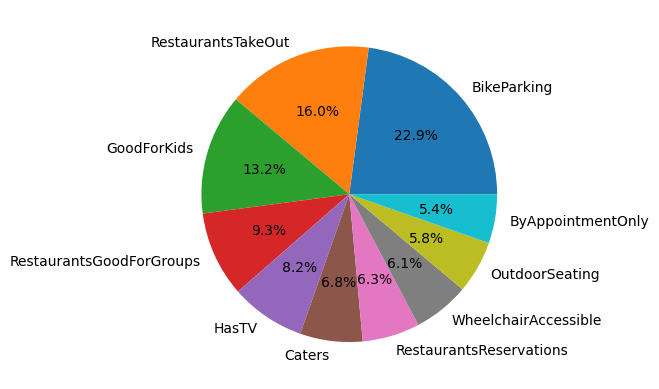

In [39]:
# Top des attributs des restaurants ayant une note moyenne supérieure à 4 à Toronto
nb_restaurants_Toronto = Business.join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").count()
nb_restaurants_4_etoiles = Business.filter(col("avg_stars") >= 4).join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").count()
Top_Attributes = Business.filter(col("avg_stars") >= 4).join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").join(Attributes, on="ID_Attributes").join(Attributes_List, on="ID_Attributes").filter(col("Value") == "True").groupBy("Name").count().orderBy(desc("count")).withColumn("%", col("count")/nb_restaurants_4_etoiles*100)
plt.pie(Top_Attributes.toPandas().head(10)["count"], labels=Top_Attributes.toPandas().head(10)["Name"], autopct='%1.1f%%')
plt.show()


25/03/12 17:02:44 WARN TaskSetManager: Stage 898 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:02:45 WARN TaskSetManager: Stage 900 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:02:45 WARN TaskSetManager: Stage 901 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:02:57 WARN TaskSetManager: Stage 916 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:02:57 WARN TaskSetManager: Stage 918 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:02:58 WARN TaskSetManager: Stage 919 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:02:59 WARN TaskSetManager: Stage 920 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.

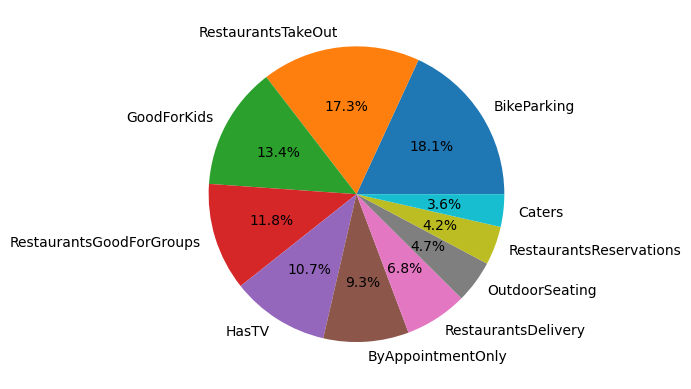

In [40]:
# Top des attributs des restaurants ayant une note moyenne inférieure ou égale à 2 à Toronto
nb_restaurants_2_etoiles = Business.filter(col("avg_stars") <= 2).join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").count()
Top_Attributes = Business.filter(col("avg_stars") <= 2).join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").join(Attributes, on="ID_Attributes").join(Attributes_List, on="ID_Attributes").filter(col("Value") == "True").groupBy("Name").count().orderBy(desc("count")).withColumn("%", col("count")/nb_restaurants_2_etoiles*100)
plt.pie(Top_Attributes.toPandas().head(10)["count"], labels=Top_Attributes.toPandas().head(10)["Name"], autopct='%1.1f%%')
plt.show()

25/03/12 15:05:16 WARN TaskSetManager: Stage 1293 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:05:17 WARN TaskSetManager: Stage 1295 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:05:17 WARN TaskSetManager: Stage 1296 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


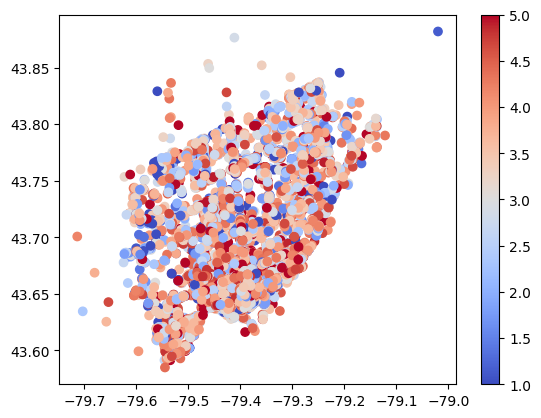

In [49]:
# Heatmap des notes moyennes des restaurants de Toronto
Heatmap = Business.join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").select("latitude", "longitude", "avg_stars")
plt.scatter(Heatmap.toPandas()["longitude"], Heatmap.toPandas()["latitude"], c=Heatmap.toPandas()["avg_stars"], cmap="coolwarm")
plt.colorbar()
plt.show()

25/03/12 16:20:53 WARN TaskSetManager: Stage 1431 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:20:53 WARN TaskSetManager: Stage 1432 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:20:53 WARN TaskSetManager: Stage 1433 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


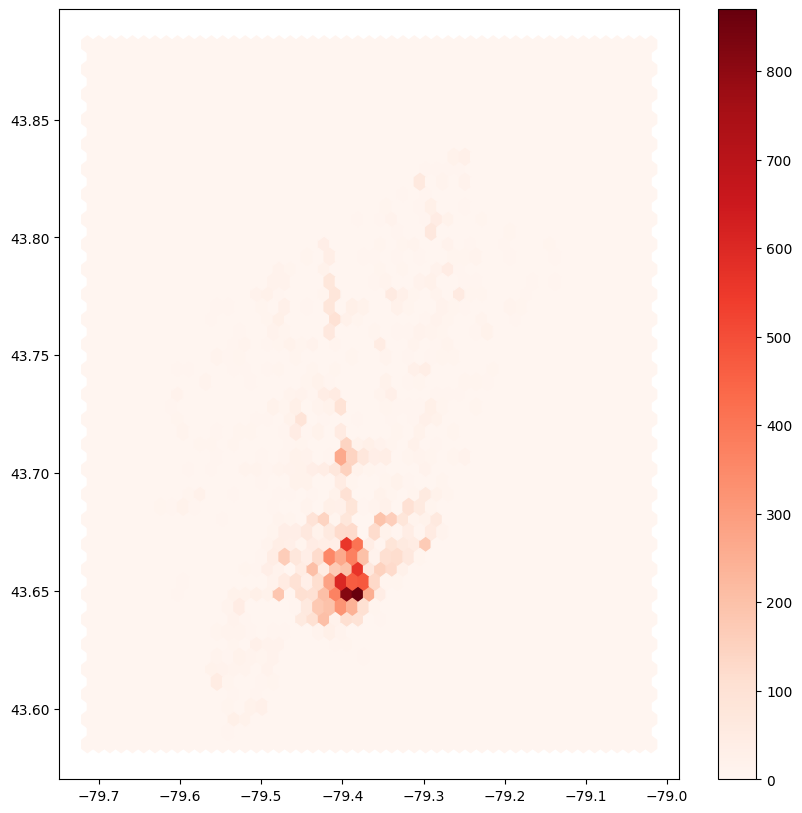

In [36]:
# Heatmap de la densité des restaurants de Toronto
Heatmap = Business.join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").select("latitude", "longitude")
plt.figure(figsize=(10, 10))
plt.hexbin(Heatmap.toPandas()["longitude"], Heatmap.toPandas()["latitude"], gridsize=50, cmap="Reds")
plt.colorbar()
plt.show()

25/03/12 17:05:06 WARN TaskSetManager: Stage 964 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:05:07 WARN TaskSetManager: Stage 966 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:05:07 WARN TaskSetManager: Stage 967 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:05:08 WARN TaskSetManager: Stage 968 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:05:08 WARN TaskSetManager: Stage 969 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 17:05:09 WARN TaskSetManager: Stage 970 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


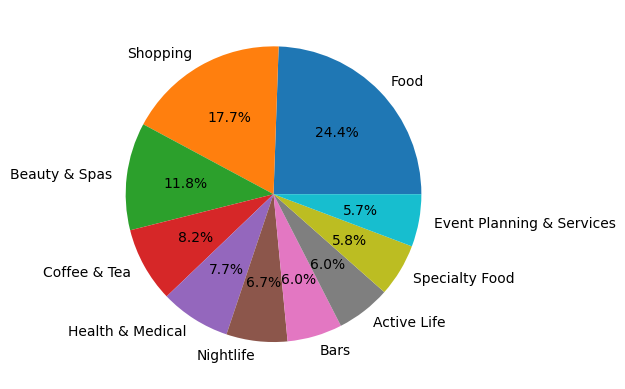

In [42]:
# Top des autres catégories des restaurants ayant une note moyenne supérieure à 4 à Toronto
Top_Categories = Business.filter(col("avg_stars") >= 4).join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").join(Categories, on="ID_Categorie").join(Categories_List, on="ID_Categorie").groupBy("Name").count().orderBy(desc("count")).withColumn("%", col("count")/nb_restaurants_4_etoiles*100)
Top_Categories = Top_Categories.filter(col("Name") != "Restaurants")
plt.pie(Top_Categories.toPandas().head(10)["count"], labels=Top_Categories.toPandas().head(10)["Name"], autopct='%1.1f%%')
plt.show()

25/03/12 15:03:29 WARN TaskSetManager: Stage 1118 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:03:29 WARN TaskSetManager: Stage 1120 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:03:30 WARN TaskSetManager: Stage 1121 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:03:30 WARN TaskSetManager: Stage 1122 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


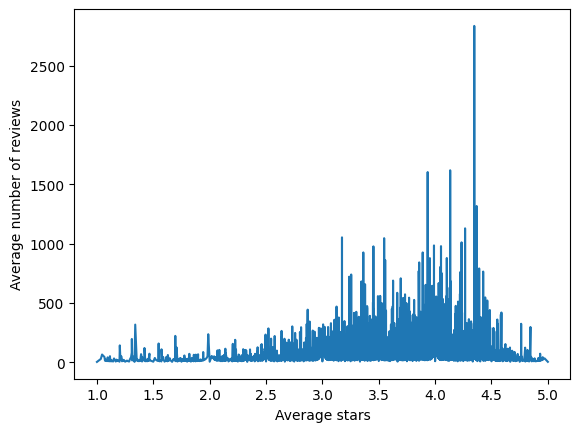

25/03/12 15:03:42 WARN TaskSetManager: Stage 1159 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:03:43 WARN TaskSetManager: Stage 1161 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:03:43 WARN TaskSetManager: Stage 1162 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:03:44 WARN TaskSetManager: Stage 1163 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


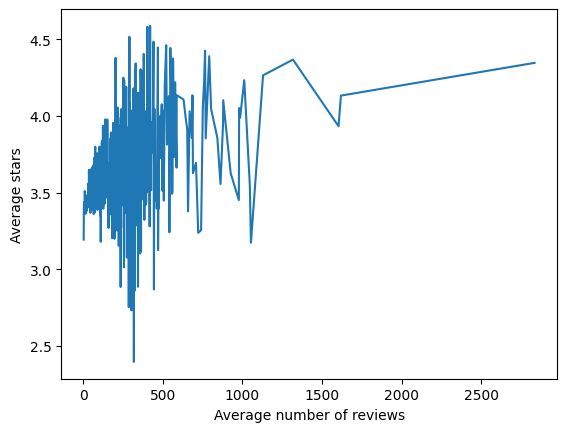

In [47]:
# Courbe de la moyenne des notes des restaurants de Toronto en fonction du nombre de reviews
nb_reviews = Business.join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").select("avg_stars", "ID_Reviews").join(Reviews, on="ID_Reviews").select("avg_stars", "Nb_Reviews")
stars_by_reviews = nb_reviews.groupBy("avg_stars").avg("Nb_Reviews").orderBy("avg_stars")
reviews_by_stars = nb_reviews.groupBy("Nb_Reviews").avg("avg_stars").orderBy("Nb_Reviews")
plt.plot(stars_by_reviews.toPandas()["avg_stars"], stars_by_reviews.toPandas()["avg(Nb_Reviews)"])
plt.xlabel("Average stars")
plt.ylabel("Average number of reviews")
plt.show()
plt.plot(reviews_by_stars.toPandas()["Nb_Reviews"], reviews_by_stars.toPandas()["avg(avg_stars)"])
plt.xlabel("Average number of reviews")
plt.ylabel("Average stars")
plt.show()


25/03/12 15:04:17 WARN TaskSetManager: Stage 1200 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:04:17 WARN TaskSetManager: Stage 1202 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:04:18 WARN TaskSetManager: Stage 1203 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:04:18 WARN TaskSetManager: Stage 1204 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


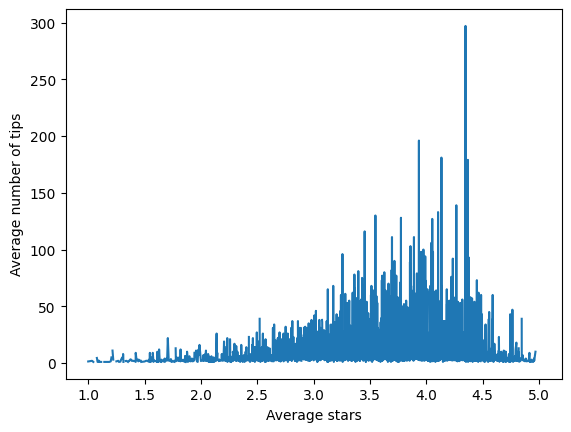

25/03/12 15:04:29 WARN TaskSetManager: Stage 1241 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:04:30 WARN TaskSetManager: Stage 1243 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:04:30 WARN TaskSetManager: Stage 1244 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:04:31 WARN TaskSetManager: Stage 1245 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


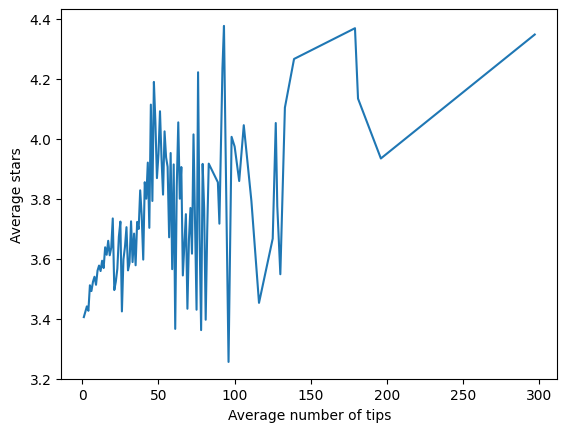

In [48]:
# Courbe de la moyenne des notes des restaurants de Toronto en fonction du nombre de tips
nb_tips = Business.join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").select("avg_stars", "ID_Reviews").join(Reviews, on="ID_Reviews").select("avg_stars", "Nb_Tips").orderBy("Nb_Tips", "avg_stars")
stars_by_tips = nb_tips.groupBy("avg_stars").avg("Nb_Tips").orderBy("avg_stars")
tips_by_stars = nb_tips.groupBy("Nb_Tips").avg("avg_stars").orderBy("Nb_Tips")
plt.plot(stars_by_tips.toPandas()["avg_stars"], stars_by_tips.toPandas()["avg(Nb_Tips)"])
plt.xlabel("Average stars")
plt.ylabel("Average number of tips")
plt.show()
plt.plot(tips_by_stars.toPandas()["Nb_Tips"], tips_by_stars.toPandas()["avg(avg_stars)"])
plt.xlabel("Average number of tips")
plt.ylabel("Average stars")
plt.show()

25/03/12 15:06:32 WARN TaskSetManager: Stage 1335 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:06:33 WARN TaskSetManager: Stage 1337 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:06:34 WARN TaskSetManager: Stage 1338 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:06:34 WARN TaskSetManager: Stage 1339 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


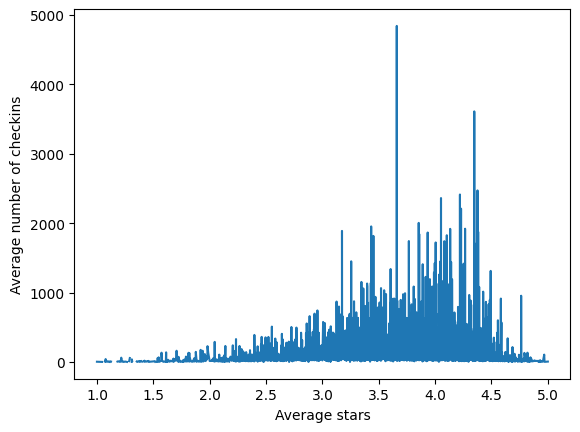

25/03/12 15:06:44 WARN TaskSetManager: Stage 1376 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:06:45 WARN TaskSetManager: Stage 1378 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:06:46 WARN TaskSetManager: Stage 1379 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:06:46 WARN TaskSetManager: Stage 1380 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


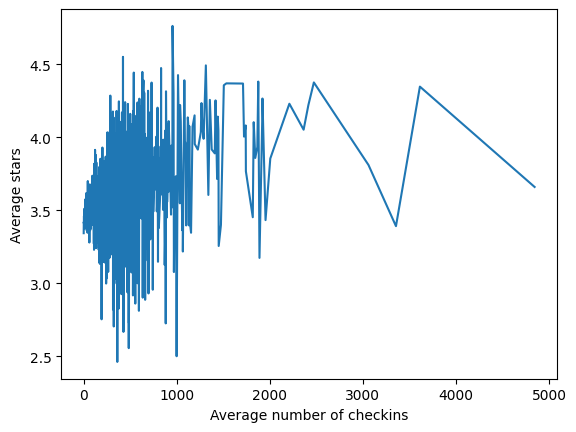

In [52]:
# Courbe de la moyenne des notes des restaurants de Toronto en fonction du nombre de checkins
nb_checkins = Business.join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").select("avg_stars", "ID_Reviews").join(Reviews, on="ID_Reviews").select("avg_stars", "Nb_Checkins").orderBy("Nb_Checkins", "avg_stars")
stars_by_checkins = nb_checkins.groupBy("avg_stars").avg("Nb_Checkins").orderBy("avg_stars")
checkins_by_stars = nb_checkins.groupBy("Nb_Checkins").avg("avg_stars").orderBy("Nb_Checkins")
plt.plot(stars_by_checkins.toPandas()["avg_stars"], stars_by_checkins.toPandas()["avg(Nb_Checkins)"])
plt.xlabel("Average stars")
plt.ylabel("Average number of checkins")
plt.show()
plt.plot(checkins_by_stars.toPandas()["Nb_Checkins"], checkins_by_stars.toPandas()["avg(avg_stars)"])
plt.xlabel("Average number of checkins")
plt.ylabel("Average stars")
plt.show()

In [ ]:
# Horaire d'ouverture les plus fréquents par jour de la semaine pour les restaurants de Toronto ayant une note moyenne supérieure à 4
Top_Hours = Business.filter(col("avg_stars") >= 4).join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").join(Hours, on="ID_Hours").filter(col("Monday") != "None").filter(col("Tuesday") != "None").filter(col("Wednesday") != "None").filter(col("Thursday") != "None").filter(col("Friday") != "None").filter(col("Saturday") != "None").filter(col("Sunday") != "None").groupBy("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday").count().orderBy(desc("count"))
Top_Hours.toPandas().head(10)


25/03/12 15:10:49 WARN TaskSetManager: Stage 1465 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:10:50 WARN TaskSetManager: Stage 1467 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:10:51 WARN TaskSetManager: Stage 1468 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:10:51 WARN TaskSetManager: Stage 1469 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,count
0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,74
1,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,25
2,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,20
3,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,18
4,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,18
5,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,17
6,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,13
7,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-17:0,13
8,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,12
9,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0,11


In [ ]:
# Note moyenne des restaurants de Toronto en fonction du prix
Price = Business.join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").join(Attributes, on="ID_Attributes").join(Attributes_List, on="ID_Attributes").filter(col("Name") == "RestaurantsPriceRange2").groupBy("value").avg("avg_stars").orderBy("value")
Price.toPandas().head(10)

25/03/12 15:33:03 WARN TaskSetManager: Stage 98 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:33:04 WARN TaskSetManager: Stage 100 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:33:04 WARN TaskSetManager: Stage 101 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:33:05 WARN TaskSetManager: Stage 102 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:33:06 WARN TaskSetManager: Stage 103 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 15:33:06 WARN TaskSetManager: Stage 104 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.


,value,avg(avg_stars)
0,1,3.457962
1,2,3.482111
2,3,3.371848
3,4,3.073448
4,None,3.174257


In [22]:
# Attributs les plus fréquents par catégorie de prix pour les restaurants de Toronto ayant une note moyenne supérieure à 4
Top_Attributes = Business.filter(col("avg_stars") >= 4).join(Localisation, on="ID_Localisation").filter(col("city") == "Toronto").join(Categories, on="ID_Categorie").join(Categories_List, on="ID_Categorie").filter(col("Name") == "Restaurants").drop("Name")
Top_Attributes = Top_Attributes.join(Attributes, on="ID_Attributes").join(Attributes_List, on="ID_Attributes").filter(col("Name") == "RestaurantsPriceRange2").drop("Name")
Top_Attributes_category1 = Top_Attributes.filter(col("value") == "1").drop("value").join(Attributes_List, on="ID_Attributes").where(col("Value") == "True").groupBy("Name").count().orderBy(desc("count"))
Top_Attributes_category2 = Top_Attributes.filter(col("value") == "2").drop("value").join(Attributes_List, on="ID_Attributes").where(col("Value") == "True").groupBy("Name").count().orderBy(desc("count"))
Top_Attributes_category3 = Top_Attributes.filter(col("value") == "3").drop("value").join(Attributes_List, on="ID_Attributes").where(col("Value") == "True").groupBy("Name").count().orderBy(desc("count"))
Top_Attributes_category4 = Top_Attributes.filter(col("value") == "4").drop("value").join(Attributes_List, on="ID_Attributes").where(col("Value") == "True").groupBy("Name").count().orderBy(desc("count"))
Top_Attributes_category1.toPandas().head(10)


25/03/12 16:34:58 WARN TaskSetManager: Stage 60 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:34:58 WARN TaskSetManager: Stage 62 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:34:59 WARN TaskSetManager: Stage 63 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:34:59 WARN TaskSetManager: Stage 64 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:00 WARN TaskSetManager: Stage 65 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:01 WARN TaskSetManager: Stage 66 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:02 WARN TaskSetManager: Stage 67 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/

,Name,count
0,RestaurantsTakeOut,496
1,GoodForKids,424
2,BikeParking,326
3,RestaurantsGoodForGroups,276
4,HasTV,266
5,Caters,209
6,OutdoorSeating,157
7,RestaurantsDelivery,106
8,RestaurantsReservations,79
9,WheelchairAccessible,74


In [23]:
Top_Attributes_category2.toPandas().head(10)


25/03/12 16:35:49 WARN TaskSetManager: Stage 117 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:50 WARN TaskSetManager: Stage 119 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:50 WARN TaskSetManager: Stage 120 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:51 WARN TaskSetManager: Stage 121 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:52 WARN TaskSetManager: Stage 122 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:52 WARN TaskSetManager: Stage 123 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:35:53 WARN TaskSetManager: Stage 124 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.

,Name,count
0,RestaurantsTakeOut,783
1,GoodForKids,631
2,RestaurantsGoodForGroups,613
3,BikeParking,600
4,HasTV,448
5,RestaurantsReservations,415
6,Caters,397
7,RestaurantsTableService,355
8,OutdoorSeating,277
9,RestaurantsDelivery,268


In [24]:
Top_Attributes_category3.toPandas().head(10)


25/03/12 16:36:20 WARN TaskSetManager: Stage 174 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:21 WARN TaskSetManager: Stage 176 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:21 WARN TaskSetManager: Stage 177 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:22 WARN TaskSetManager: Stage 178 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:22 WARN TaskSetManager: Stage 179 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:23 WARN TaskSetManager: Stage 180 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:24 WARN TaskSetManager: Stage 181 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.

,Name,count
0,RestaurantsReservations,112
1,RestaurantsGoodForGroups,104
2,BikeParking,76
3,RestaurantsTableService,57
4,RestaurantsTakeOut,56
5,OutdoorSeating,53
6,HasTV,43
7,Caters,37
8,GoodForKids,32
9,HappyHour,15


In [25]:
Top_Attributes_category4.toPandas().head(10)

25/03/12 16:36:35 WARN TaskSetManager: Stage 231 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:36 WARN TaskSetManager: Stage 233 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:36 WARN TaskSetManager: Stage 234 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:37 WARN TaskSetManager: Stage 235 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:38 WARN TaskSetManager: Stage 236 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:38 WARN TaskSetManager: Stage 237 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.
25/03/12 16:36:39 WARN TaskSetManager: Stage 238 contains a task of very large size (9780 KiB). The maximum recommended task size is 1000 KiB.

,Name,count
0,RestaurantsReservations,32
1,RestaurantsGoodForGroups,22
2,BikeParking,20
3,RestaurantsTableService,14
4,HasTV,10
5,OutdoorSeating,9
6,RestaurantsTakeOut,9
7,Caters,8
8,RestaurantsDelivery,5
9,CoatCheck,2
